# COMPUTATION ON NUMPY ARRAYS
Computation on numpy arrays can be very fast or slow but the KEY to making it fast is to use vectorized operations generally implemented through numpys universal functions (ufuncs). These are used to make repeated calculation on arrays much more efficient. The ufuncs perform the operation on each element in the array. Thats better than writing a loop to access each element in the array

In [1]:
# Demo of computation using a forloop
import timeit
start = timeit.timeit() #start time
import numpy as np
np.random.seed(0)

def compute_reciprocal(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1/values[i]
    return output    
big_array = np.random.randint(1,10,size=500)
cr = compute_reciprocal(big_array)
end = timeit.timeit() #end time
print("\n time-taken to compute reciprocal of the big_array using for loops", (end-start)*1000,'ms')

start1 = timeit.timeit()
#Using vectorized operation
cr2 = 1/big_array
end1 = timeit.timeit()
print("\n Time taken to compute reciprocal of the big_array using vectorized operations is", (end1-start1)*1000,'ms')


 time-taken to compute reciprocal of the big_array using for loops -272.4207999999635 ms

 Time taken to compute reciprocal of the big_array using vectorized operations is -0.6234000029508024 ms


In [2]:
# Vectorized Division
print("Vector divided by vector\n", np.arange(5)/np.arange(1,6)) #Array divided by array
print("\nscalar multiplied by array\n", 2*np.arange(5)) #scalar multiplied by array

Vector divided by vector
 [0.         0.5        0.66666667 0.75       0.8       ]

scalar multiplied by array
 [0 2 4 6 8]


In [3]:
# Absolute Value
y = np.linspace(-2,2,5) #create an array from -2 to 2 in steps of 1
print("Absolute value of y is ", np.absolute(y))

Absolute value of y is  [2. 1. 0. 1. 2.]


In [4]:
#Trig functions
theta = np.linspace(0,np.pi,3)
#Compute the trig functions using the numpy trig functions
print("\n Cos theta is ", np.cos(theta))
#Inverse trig functions
#print("\n Arc sin theta is ", np.arcsin(theta))

x = np.arange(30).reshape(2,3,5)
print("\n x is ", x)
np.log2(x)


 Cos theta is  [ 1.000000e+00  6.123234e-17 -1.000000e+00]

 x is  [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]


C:\Users\DAVIS\AppData\Local\Temp\ipykernel_11132\3201065098.py:10: RuntimeWarning: divide by zero encountered in log2
  np.log2(x)


array([[[      -inf, 0.        , 1.        , 1.5849625 , 2.        ],
        [2.32192809, 2.5849625 , 2.80735492, 3.        , 3.169925  ],
        [3.32192809, 3.45943162, 3.5849625 , 3.70043972, 3.80735492]],

       [[3.9068906 , 4.        , 4.08746284, 4.169925  , 4.24792751],
        [4.32192809, 4.39231742, 4.45943162, 4.52356196, 4.5849625 ],
        [4.64385619, 4.70043972, 4.7548875 , 4.80735492, 4.857981  ]]])

In [5]:
# Reduce and Accumulate
#Reduce performs an operation on an array until it reduces to a single result
yy = np.arange(1,10)
print("\nyy has been reduced by addition to ", np.add.reduce(yy))
#Accumulate performs an operation repeatedly on an array while showing the accumulated results
print("\nyy has been accumulated by addition to ", np.add.accumulate(yy))


yy has been reduced by addition to  45

yy has been accumulated by addition to  [ 1  3  6 10 15 21 28 36 45]


# AGGREGATION ON ARRAYS
This is essential when trying to compute summary statistics on a dataset

In [7]:
#Examples
# SUM
big_array = np.random.random(100000) #This gives an array of 100 random numbers 
%timeit m_sum1 = sum(big_array)
%timeit m_sum2 = np.sum(big_array) #np.sum yields a faster output

21.9 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
143 µs ± 8.33 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
# MINIMUM & MAXIMUM
min_b = min(big_array); print("\nminimum of big array is ", min_b)
max_b = max(big_array); print("\nmaximum of big array is ", max_b) 


minimum of big array is  1.354237572837036e-05

maximum of big array is  0.9999990120313899


In [11]:
npmin_b = np.min(big_array); print("\nNumpy minimum of big array is ", npmin_b)
npmax_b = np.max(big_array); print("\nNumpy maximum of big array is ", npmax_b) #operates faster than min & max


Numpy minimum of big array is  1.354237572837036e-05

Numpy maximum of big array is  0.9999990120313899


# EXAMPLE: WHAT IS THE AVERAGE POPULATION IN USA

Mean population =  6162876.3 
Standard deviation of Population =  6779407.114632265 
Minimum of the Population =  563626 
Maximum of the Population =  37253956

25th percentile =  1833004.25

Median =  4436369.5

75th percentile =  6680312.25


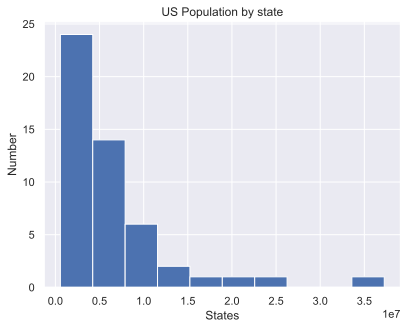

In [39]:
import pandas as pd
data = pd.read_csv('C:/Users/DAVIS/Documents/Data/state.csv') #read the file using pandas into a dataframe

Population = np.array(data['Population']) #Get the field called population

#Visualize the data first
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':12}) # set global font size
import seaborn; seaborn.set()
plt.hist(Population)
plt.title("US Population by state")
plt.xlabel("States")
plt.ylabel("Number")

#Compute Summary Statistics
print("Mean population = ", Population.mean(),"\nStandard deviation of Population = ",Population.std(),"\
\nMinimum of the Population = ",np.min(Population), "\nMaximum of the Population = ", np.max(Population))

#Compute Percentiles
print("\n25th percentile = ", np.percentile(Population,25))
print("\nMedian = ", np.percentile(Population,50))
print("\n75th percentile = ", np.percentile(Population,75))
